## Checks:
1. Stereochemistry
2. Hypervalency
3. Duplicate structures
4. Identifiers
5. Mismatches between structure representations 

In [60]:
import pandas as pd
from rdkit import Chem
df = pd.read_csv('SMILES_VP_2980.csv')
smiles = df['standardized_smiles'].tolist()
mols = [Chem.MolFromSmiles(smi,sanitize = True) for smi in smiles]
print(len([m for m in mols if m is None]))
#no hypervalance issues here

0


In [61]:
#check for missing stereo
from rdkit.Chem.EnumerateStereoisomers import EnumerateStereoisomers, StereoEnumerationOptions,GetStereoisomerCount
stereocenters = [GetStereoisomerCount(m) for m in mols]
print(len([s for s in stereocenters if s > 1]))
#quite a few are missing stereo info!

425


2980
2977


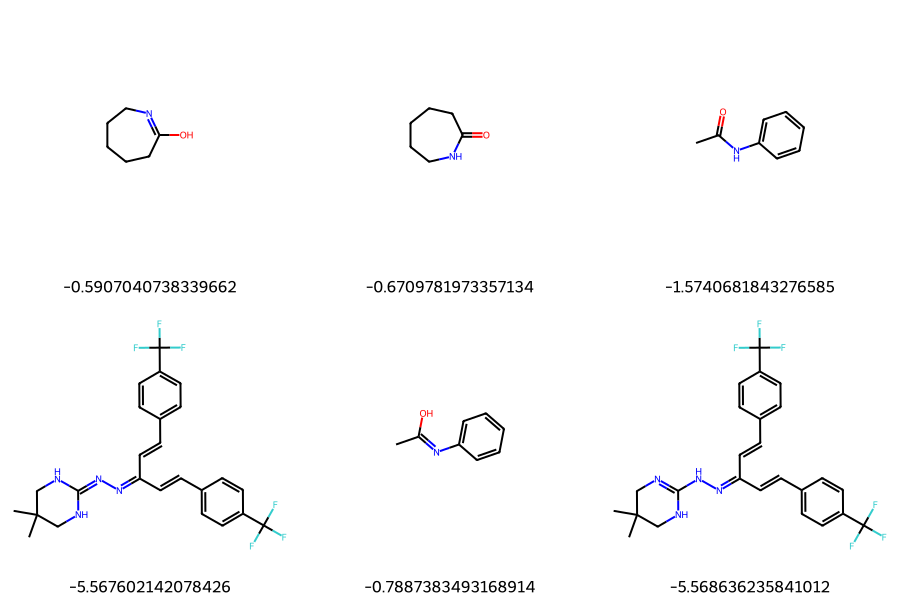

In [62]:
#check for duplicates: inchikey from mols
from rdkit.Chem import inchi
inchikeys = [inchi.MolToInchiKey(m) for m in mols]
print(len(inchikeys))
print(len(set(inchikeys)))
#oeh we have three duplicates! lets get those
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

#lets get the duplicates
from collections import Counter
c = Counter(inchikeys)
duplicates = [k for k,v in c.items() if v > 1]

#lets get the mols
duplicates_mols = [m for m in mols if inchi.MolToInchiKey(m) in duplicates]

#lets get the smiles
duplicates_smiles = [Chem.MolToSmiles(m) for m in duplicates_mols]

#lets get the vapour pressures
duplicates_vp = [df['vp_log10pa'][df['standardized_smiles'] == s].tolist()[0] for s in duplicates_smiles]
duplicates_vp_str = [str(x) for x in duplicates_vp]

#lets draw the mols
Draw.MolsToGridImage(duplicates_mols, molsPerRow=3, subImgSize=(300,300), legends=duplicates_vp_str)
#definitely duplicates, with different vapour pressures!

In [63]:
#can we cross-compare to reach and ochem based on inchikey?
#lets add inchikey to the df

df['inchikey'] = inchikeys
df.head()
working_df = df.copy()

In [64]:
df_reach_standardized = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/REACH_standardized_not_cleaned.csv')
df_ochem_standardized = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OCHEM_standardized_not_cleaned.csv')
#inchikey via mol from standardized_smiles for both
df_reach_standardized['inchikey'] = [inchi.MolToInchiKey(Chem.MolFromSmiles(smi,sanitize = True)) for smi in df_reach_standardized['standardized_smiles']]
df_ochem_standardized['inchikey'] = [inchi.MolToInchiKey(Chem.MolFromSmiles(smi,sanitize = True)) for smi in df_ochem_standardized['standardized_smiles']]

In [65]:
df_ochem_standardized

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,...,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms,log10VP_pa,inchikey
0,0,BrC1=C(OC2=CC=CC=C2)C=CC=C1,0.1630,Pa,25.0,°C,supercooled liquid Vp,GC-RT,NaN,NaN,...,NaN,-,2f403fe24e39d29f948aa4e9feb6710b,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -13.9325470697...",298.15,0.1630,Brc1ccccc1Oc1ccccc1,14,-0.787812,RRWFUWRLNIZICP-UHFFFAOYSA-N
1,1,BrC1=CC(OC2=CC=CC=C2)=CC=C1,0.1280,Pa,25.0,°C,supercooled liquid Vp,GC-RT,NaN,NaN,...,NaN,-,5de10590a173bcca8091c5a2e49b3a8d,"[14, 2, 0, 1, 0, 0, 0, 0, 1, 0, -60.2223414903...",298.15,0.1280,Brc1cccc(Oc2ccccc2)c1,14,-0.892790,AHDAKFFMKLQPTD-UHFFFAOYSA-N
2,2,BrC1=CC=C(OC2=CC=CC=C2)C=C1,0.2590,Pa,25.0,°C,subcooled liquid Vp,GC-RT,NaN,NaN,...,NaN,-,1dc397b6c45db1b753a8d3c809ae4c35,NaN,298.15,0.2590,Brc1ccc(Oc2ccccc2)cc1,14,-0.586700,JDUYPUMQALQRCN-UHFFFAOYSA-N
3,3,BrC1=CC=C(OC2=CC=CC=C2)C(Br)=C1,0.0168,Pa,25.0,°C,supercooled liquid Vp,GC-RT,uncertain CASRN,NaN,...,NaN,-,691f98cac2af77da13b08d10870c78aa,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -32.3294917860...",298.15,0.0168,Brc1ccc(Oc2ccccc2)c(Br)c1,15,-1.774691,JMCIHKKTRDLVCO-UHFFFAOYSA-N
4,4,BrC1=CC=C(OC2=CC=CC=C2Br)C=C1,0.0137,Pa,25.0,°C,supercooled liquid Vp,GC-RT,uncertain CASRN,NaN,...,NaN,-,63cb7d7427b0eed5b7146effd265ee88,"[15, 2, 0, 1, 0, 0, 0, 0, 2, 0, -27.1301580654...",298.15,0.0137,Brc1ccc(Oc2ccccc2Br)cc1,15,-1.863279,RJQLQJZMLISKRJ-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,FC(F)(F)C(=O)C(F)(F)F,3.3500,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,...,NaN,-,bb4b00a287653ef8b01115b6a112dec2,NaN,NaN,3.3500,O=C(C(F)(F)F)C(F)(F)F,10,0.525045,VBZWSGALLODQNC-UHFFFAOYSA-N
4995,4995,OC(=O)C(F)(F)F,2.0400,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,...,NaN,-,9b7c414818e92c6f9c3f98f4895db75c,NaN,NaN,2.0400,O=C(O)C(F)(F)F,7,0.309630,DTQVDTLACAAQTR-UHFFFAOYSA-N
4996,4996,F\C(=C(\F)C(F)(F)F)C(F)(F)F,3.3000,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,...,NaN,-,a4275c1633655b7f2607694f6bf15771,"[12, 0, 0, 0, 8, 0, 0, 0, 0, 0, 18.08974888038...",NaN,3.3000,F/C(=C(/F)C(F)(F)F)C(F)(F)F,12,0.518514,WSJULBMCKQTTIG-OWOJBTEDSA-N
4997,4997,FC(F)(F)C(=O)C(F)(F)Cl,3.1600,log(mmHg),NaN,-,NaN,NaN,"QsarDB repository, 2019, 10.15152:QDB",NaN,...,NaN,-,7eca34c4806897d349ab1d3e568d88f8,"[10, 1, 0, 1, 5, 0, 0, 1, 0, 0, 71.59181390511...",NaN,3.1600,O=C(C(F)(F)F)C(F)(F)Cl,10,0.499687,OJUUDWYPNQALHZ-UHFFFAOYSA-N


In [66]:
df_reach_standardized[df_reach_standardized['standardized_smiles']== 'CCCOCC(C)O']

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),VP_Pa,Temperature_K,SMILES,standardized_smiles,log10_VP_Pa,NumHeavyAtoms,inchikey
324,1-propoxypropan-2-ol,1569-01-3,1-propoxypropan-2-ol,NaN,NaN,NaN,1.7,mm Hg,NaN,NaN,NaN,25.0,C,226.6474,298.15,CCCOCC(C)O,CCCOCC(C)O,2.355351,8,FENFUOGYJVOCRY-UHFFFAOYSA-N


In [68]:
#now for each inchikey in working_df, get the max and min value of vp_log10pa from the other two dfs. make new df from this
#first, get the inchikeys from working_df
inchikeys_working = working_df['inchikey'].tolist()
vp_working = working_df['vp_log10pa'].tolist()
smiles_working = working_df['standardized_smiles'].tolist()
#now, get the max and min values from the other two dfs
vp_max_reach = []
vp_min_reach = []
vp_max_ochem = []
vp_min_ochem = []

for i in smiles_working:
    #reach
    try:
        vp_max_reach.append(df_reach_standardized['log10_VP_Pa'][df_reach_standardized['standardized_smiles'] == i].max())
    except:
        vp_max_reach.append('NA')
    try:
        vp_min_reach.append(df_reach_standardized['log10_VP_Pa'][df_reach_standardized['standardized_smiles'] == i].min())
    except:
        vp_min_reach.append('NA')
    #ochem
    try:
        vp_max_ochem.append(df_ochem_standardized['log10VP_pa'][df_ochem_standardized['standardized_smiles'] == i].max())
    except:
        vp_max_ochem.append('NA')
    try:
        vp_min_ochem.append(df_ochem_standardized['log10VP_pa'][df_ochem_standardized['standardized_smiles'] == i].min())
    except:
        vp_min_ochem.append('NA')

#now, make a new df from this
df_cross_compare = pd.DataFrame()
df_cross_compare['inchikey'] = inchikeys_working
df_cross_compare['smiles'] = smiles_working
df_cross_compare['vp_working'] = vp_working
df_cross_compare['vp_max_reach'] = vp_max_reach
df_cross_compare['vp_min_reach'] = vp_min_reach
df_cross_compare['vp_max_ochem'] = vp_max_ochem
df_cross_compare['vp_min_ochem'] = vp_min_ochem
df_cross_compare.head(50)

,inchikey,smiles,vp_working,vp_max_reach,vp_min_reach,vp_max_ochem,vp_min_ochem
0,UHOVQNZJYSORNB-UHFFFAOYSA-N,c1ccccc1,4.100855,4.140382,3.998695,0.612784,0.612784
1,HVUMOYIDDBPOLL-IIZJTUPISA-N,CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[...,-11.744727,-11.744727,-11.744727,NaN,NaN
2,IICQZTQZQSBHBY-UHFFFAOYSA-N,CC=CCCCCCC,2.698933,NaN,NaN,NaN,NaN
3,UOBYKYZJUGYBDK-UHFFFAOYSA-N,O=C(O)c1ccc2ccccc2c1,-3.053323,NaN,NaN,-5.178225,-5.178225
4,HRQGCQVOJVTVLU-UHFFFAOYSA-N,ClCOCCl,3.591625,NaN,NaN,1.468347,0.555094
5,SLMFWJQZLPEDDU-UHFFFAOYSA-N,CC#CC(C)C,4.227887,NaN,NaN,NaN,NaN
6,UMNKXPULIDJLSU-UHFFFAOYSA-N,FC(Cl)Cl,5.260000,NaN,NaN,0.720986,0.720986
7,WHKUVVPPKQRRBV-UHFFFAOYSA-N,Cc1cc(Cl)ccc1OCC(=O)O,-3.104246,NaN,NaN,-5.229148,-5.229148
8,YXZFFTJAHVMMLF-UHFFFAOYSA-N,CC(C)CCBr,3.662114,NaN,NaN,1.539327,0.187239
9,HSQFVBWFPBKHEB-UHFFFAOYSA-N,Oc1ccc(Cl)c(Cl)c1Cl,0.540000,NaN,NaN,-0.267606,-0.267606


In [71]:
df_reach_standardized

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),VP_Pa,Temperature_K,SMILES,standardized_smiles,log10_VP_Pa,NumHeavyAtoms,inchikey
0,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,5.060000e-08,mm Hg,NaN,NaN,NaN,25.0,C,0.000007,298.15,NCCC(O)=O,NCCC(=O)O,-5.170948,6,UCMIRNVEIXFBKS-UHFFFAOYSA-N
1,Ô_-alanine,107-95-9,3-Aminopropionic acid,NaN,NaN,NaN,6.740000e-06,Pa,NaN,NaN,NaN,25.0,C,0.000007,298.15,NCCC(O)=O,NCCC(=O)O,-5.171340,6,UCMIRNVEIXFBKS-UHFFFAOYSA-N
2,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,3.440000e-01,hPa,NaN,NaN,NaN,20.0,C,34.400000,293.15,O=C1CCCO1,O=C1CCCO1,1.536558,6,YEJRWHAVMIAJKC-UHFFFAOYSA-N
3,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,4.000000e-01,hPa,NaN,NaN,NaN,20.0,C,40.000000,293.15,O=C1CCCO1,O=C1CCCO1,1.602060,6,YEJRWHAVMIAJKC-UHFFFAOYSA-N
4,Ô_-butyrolactone,96-48-0,oxolan-2-one,NaN,NaN,NaN,9.000000e-01,hPa,NaN,NaN,NaN,20.0,C,90.000000,293.15,O=C1CCCO1,O=C1CCCO1,1.954243,6,YEJRWHAVMIAJKC-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4532,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,2.800000e-01,Pa,NaN,NaN,NaN,25.0,C,0.280000,298.15,CCCCCCCCCCCC(=O)OC=C,C=COC(=O)CCCCCCCCCCC,-0.552842,16,GLVVKKSPKXTQRB-UHFFFAOYSA-N
4533,vinyl laurate,2146-71-6,Vinyl laurate,NaN,NaN,NaN,7.110000e-01,Pa,NaN,NaN,NaN,25.0,C,0.711000,298.15,CCCCCCCCCCCC(=O)OC=C,C=COC(=O)CCCCCCCCCCC,-0.148130,16,GLVVKKSPKXTQRB-UHFFFAOYSA-N
4534,vinylene carbonate,872-36-6,"1,3-dioxol-2-one",NaN,NaN,NaN,3.350000e+02,Pa,NaN,NaN,NaN,25.0,C,335.000000,298.15,O=C1OC=CO1,O=c1occo1,2.525045,6,VAYTZRYEBVHVLE-UHFFFAOYSA-N
4535,warfarin,81-81-2,(RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin,NaN,NaN,NaN,3.470000e-03,Pa,NaN,NaN,NaN,20.0,C,0.003470,293.15,CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O,CC(=O)CC(c1ccccc1)c1c(O)oc2ccccc2c1=O,-2.459671,23,QTXVAVXCBMYBJW-UHFFFAOYSA-N


In [72]:
#now for each inchikey in working_df, get the max and min value of vp_log10pa from the other two dfs. make new df from this
#first, get the inchikeys from working_df
inchikeys_working = working_df['inchikey'].tolist()
vp_working = working_df['vp_log10pa'].tolist()
smiles_working = working_df['standardized_smiles'].tolist()
#now, get the max and min values from the other two dfs
vp_max_reach = []
vp_min_reach = []
vp_max_ochem = []
vp_min_ochem = []
df_reach_standardized_298 = df_reach_standardized[df_reach_standardized['Temperature_K'] == 298.15]
df_ochem_standardized_298 = df_ochem_standardized[df_ochem_standardized['Temperature_K'] == 298.15]
for i in smiles_working:
    #reach
    try:
        vp_max_reach.append(df_reach_standardized_298['log10_VP_Pa'][df_reach_standardized_298['standardized_smiles'] == i].max())
    except:
        vp_max_reach.append('NA')
    try:
        vp_min_reach.append(df_reach_standardized_298['log10_VP_Pa'][df_reach_standardized_298['standardized_smiles'] == i].min())
    except:
        vp_min_reach.append('NA')
    #ochem
    try:
        vp_max_ochem.append(df_ochem_standardized_298['log10VP_pa'][df_ochem_standardized_298['standardized_smiles'] == i].max())
    except:
        vp_max_ochem.append('NA')
    try:
        vp_min_ochem.append(df_ochem_standardized_298['log10VP_pa'][df_ochem_standardized_298['standardized_smiles'] == i].min())
    except:
        vp_min_ochem.append('NA')

#now, make a new df from this
df_cross_compare_298 = pd.DataFrame()
df_cross_compare_298['inchikey'] = inchikeys_working
df_cross_compare_298['smiles'] = smiles_working
df_cross_compare_298['vp_working'] = vp_working
df_cross_compare_298['vp_max_reach'] = vp_max_reach
df_cross_compare_298['vp_min_reach'] = vp_min_reach
df_cross_compare_298['vp_max_ochem'] = vp_max_ochem
df_cross_compare_298['vp_min_ochem'] = vp_min_ochem
print(len(df_cross_compare_298))
df_cross_compare_298_clean = df_cross_compare_298.copy()
df_cross_compare_298_clean.dropna(subset=['vp_max_reach', 'vp_min_reach', 'vp_max_ochem', 'vp_min_ochem'], how='all', inplace=True)
print(len(df_cross_compare_298_clean))

2980
2681


In [69]:
#drop if vp_max_reach	vp_min_reach	vp_max_ochem	vp_min_ochem are all NA
print(len(df_cross_compare))
df_cross_compare_clean = df_cross_compare.copy()
df_cross_compare_clean.dropna(subset=['vp_max_reach', 'vp_min_reach', 'vp_max_ochem', 'vp_min_ochem'], how='all', inplace=True)
print(len(df_cross_compare_clean))
df_cross_compare_clean.head(50)



2980
2702


,inchikey,smiles,vp_working,vp_max_reach,vp_min_reach,vp_max_ochem,vp_min_ochem
0,UHOVQNZJYSORNB-UHFFFAOYSA-N,c1ccccc1,4.100855,4.140382,3.998695,0.612784,0.612784
1,HVUMOYIDDBPOLL-IIZJTUPISA-N,CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[...,-11.744727,-11.744727,-11.744727,NaN,NaN
3,UOBYKYZJUGYBDK-UHFFFAOYSA-N,O=C(O)c1ccc2ccccc2c1,-3.053323,NaN,NaN,-5.178225,-5.178225
4,HRQGCQVOJVTVLU-UHFFFAOYSA-N,ClCOCCl,3.591625,NaN,NaN,1.468347,0.555094
6,UMNKXPULIDJLSU-UHFFFAOYSA-N,FC(Cl)Cl,5.260000,NaN,NaN,0.720986,0.720986
7,WHKUVVPPKQRRBV-UHFFFAOYSA-N,Cc1cc(Cl)ccc1OCC(=O)O,-3.104246,NaN,NaN,-5.229148,-5.229148
8,YXZFFTJAHVMMLF-UHFFFAOYSA-N,CC(C)CCBr,3.662114,NaN,NaN,1.539327,0.187239
9,HSQFVBWFPBKHEB-UHFFFAOYSA-N,Oc1ccc(Cl)c(Cl)c1Cl,0.540000,NaN,NaN,-0.267606,-0.267606
10,BIDIHFPLDRSAMB-AATRIKPKSA-N,C/C=C/C(C)(C)C,4.170000,NaN,NaN,0.620136,0.620136
11,MJOBQUIJUFKMPR-UHFFFAOYSA-N,O=C(CC(CP1(=O)Oc2ccccc2-c2ccccc21)C(=O)OCCO)OCCO,-5.048177,-5.048177,-5.203426,NaN,NaN


In [70]:
#make df with subset: diff between vp_max_reach and	vp_min_reach is too big (> 1), diff between	vp_max_ochem and vp_min_ochem is too big (> 1), or diff between vp_max_reach and vp_max_ochem is too big (> 1)
df_cross_compare_clean_subset = df_cross_compare_clean.copy()
df_cross_compare_clean_subset['diff_reach'] = df_cross_compare_clean_subset['vp_max_reach'] - df_cross_compare_clean_subset['vp_min_reach']
df_cross_compare_clean_subset['diff_ochem'] = df_cross_compare_clean_subset['vp_max_ochem'] - df_cross_compare_clean_subset['vp_min_ochem']
df_cross_compare_clean_subset['diff_reach_ochem'] = df_cross_compare_clean_subset['vp_max_reach'] - df_cross_compare_clean_subset['vp_max_ochem']
df_cross_compare_clean_subset.head(50)
#sort by diff_reach, diff_ochem, diff_reach_ochem
df_cross_compare_clean_subset.sort_values(by=['diff_reach'], ascending=False, inplace=True)
df_cross_compare_clean_subset.sort_values(by=['diff_ochem'], ascending=False, inplace=True)
df_cross_compare_clean_subset.sort_values(by=['diff_reach_ochem'], ascending=False, inplace=True)
df_cross_compare_clean_subset.head(50)

,inchikey,smiles,vp_working,vp_max_reach,vp_min_reach,vp_max_ochem,vp_min_ochem,diff_reach,diff_ochem,diff_reach_ochem
343,CCCMONHAUSKTEQ-UHFFFAOYSA-N,C=CCCCCCCCCCCCCCCCC,-2.047897,4.396199,-1.721246,-4.170696,-4.170696,6.117446,0.000000,8.566896
213,VKOBVWXKNCXXDE-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCC(=O)O,-6.616700,-1.714443,-4.350052,-8.741602,-8.741602,2.635609,0.000000,7.027160
36,GQEZCXVZFLOKMC-UHFFFAOYSA-N,C=CCCCCCCCCCCCCCC,-0.451747,4.396199,-1.769551,-2.578396,-2.578396,6.165750,0.000000,6.974595
903,DOIRQSBPFJWKBE-UHFFFAOYSA-N,CCCCOC(=O)c1ccccc1C(=O)OCCCC,-2.571427,1.673942,-2.013228,-4.696804,-4.696804,3.687170,0.000000,6.370746
1438,IAHFWCOBPZCAEA-UHFFFAOYSA-N,N#CCCC#N,0.015881,4.016281,4.016281,-2.109020,-2.109020,0.000000,0.000000,6.125301
1564,DOOTYTYQINUNNV-UHFFFAOYSA-N,CCOC(=O)CC(O)(CC(=O)OCC)C(=O)OCC,-1.038141,2.401364,-1.379554,-3.163043,-3.163043,3.780917,0.000000,5.564407
2325,GLDOVTGHNKAZLK-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCO,-3.443734,-0.363512,-3.481486,-5.568636,-5.568636,3.117974,0.000000,5.205124
1754,PXBRQCKWGAHEHS-UHFFFAOYSA-N,FC(F)(Cl)Cl,5.810000,5.886530,5.753291,0.764176,0.566555,0.133239,0.197621,5.122354
411,INQOMBQAUSQDDS-UHFFFAOYSA-N,CI,4.731178,7.724767,4.724785,2.607455,0.416141,2.999982,2.191314,5.117312
787,HFDVRLIODXPAHB-UHFFFAOYSA-N,C=CCCCCCCCCCCCC,0.300497,4.396199,-0.920819,-0.522879,-0.522879,5.317018,0.000000,4.919078


In [73]:
#make df with subset: diff between vp_max_reach and	vp_min_reach is too big (> 1), diff between	vp_max_ochem and vp_min_ochem is too big (> 1), or diff between vp_max_reach and vp_max_ochem is too big (> 1)
df_cross_compare_clean_298_subset = df_cross_compare_298_clean.copy()
df_cross_compare_clean_298_subset['diff_reach'] = df_cross_compare_clean_298_subset['vp_max_reach'] - df_cross_compare_clean_298_subset['vp_min_reach']
df_cross_compare_clean_298_subset['diff_ochem'] = df_cross_compare_clean_298_subset['vp_max_ochem'] - df_cross_compare_clean_298_subset['vp_min_ochem']
df_cross_compare_clean_298_subset['diff_reach_ochem'] = df_cross_compare_clean_298_subset['vp_max_reach'] - df_cross_compare_clean_298_subset['vp_max_ochem']
df_cross_compare_clean_subset.head(50)
#sort by diff_reach, diff_ochem, diff_reach_ochem
df_cross_compare_clean_298_subset.sort_values(by=['diff_reach'], ascending=False, inplace=True)
df_cross_compare_clean_298_subset.sort_values(by=['diff_ochem'], ascending=False, inplace=True)
df_cross_compare_clean_298_subset.sort_values(by=['diff_reach_ochem'], ascending=False, inplace=True)
df_cross_compare_clean_298_subset.head(50)

,inchikey,smiles,vp_working,vp_max_reach,vp_min_reach,vp_max_ochem,vp_min_ochem,diff_reach,diff_ochem,diff_reach_ochem
343,CCCMONHAUSKTEQ-UHFFFAOYSA-N,C=CCCCCCCCCCCCCCCCC,-2.047897,4.396199,-1.721246,-4.170696,-4.170696,6.117446,0.000000,8.566896
213,VKOBVWXKNCXXDE-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCCC(=O)O,-6.616700,-1.714443,-4.350052,-8.741602,-8.741602,2.635609,0.000000,7.027160
36,GQEZCXVZFLOKMC-UHFFFAOYSA-N,C=CCCCCCCCCCCCCCC,-0.451747,4.396199,-1.769551,-2.578396,-2.578396,6.165750,0.000000,6.974595
1564,DOOTYTYQINUNNV-UHFFFAOYSA-N,CCOC(=O)CC(O)(CC(=O)OCC)C(=O)OCC,-1.038141,2.401364,-1.379554,-3.163043,-3.163043,3.780917,0.000000,5.564407
2325,GLDOVTGHNKAZLK-UHFFFAOYSA-N,CCCCCCCCCCCCCCCCCCO,-3.443734,-0.363512,-3.481486,-5.568636,-5.568636,3.117974,0.000000,5.205124
411,INQOMBQAUSQDDS-UHFFFAOYSA-N,CI,4.731178,7.724767,4.724785,2.607455,0.674861,2.999982,1.932594,5.117312
787,HFDVRLIODXPAHB-UHFFFAOYSA-N,C=CCCCCCCCCCCCC,0.300497,4.396199,0.301030,-0.522879,-0.522879,4.095169,0.000000,4.919078
903,DOIRQSBPFJWKBE-UHFFFAOYSA-N,CCCCOC(=O)c1ccccc1C(=O)OCCCC,-2.571427,0.000000,-2.013228,-4.696804,-4.696804,2.013228,0.000000,4.696804
236,GETQZCLCWQTVFV-UHFFFAOYSA-N,CN(C)C,5.331219,5.355145,5.331630,0.726727,0.726727,0.023515,0.000000,4.628418
116,HLZKNKRTKFSKGZ-UHFFFAOYSA-N,CCCCCCCCCCCCCCO,-1.833705,0.426511,-2.533132,-3.958607,-3.958607,2.959644,0.000000,4.385119


In [75]:
df_reach_standardized[df_reach_standardized['standardized_smiles'] == 'C=CCCCCCCCCCCCCCCCC']

,#name,cas,iupacName,P (upperQualifier),P (upperValue),P (lowerQualifier),P (lowerValue),P (unit),T (upperQualifier),T (upperValue),T (lowerQualifier),T (lowerValue),T (unit),VP_Pa,Temperature_K,SMILES,standardized_smiles,log10_VP_Pa,NumHeavyAtoms,inchikey
3889,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,1.70000,hPa,NaN,NaN,NaN,20.0,C,170.000,293.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,2.230449,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3890,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,20200.00000,Pa,NaN,NaN,NaN,20.0,C,20200.000,293.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,4.305351,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3891,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,0.11500,Pa,NaN,NaN,NaN,20.0,C,0.115,293.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,-0.939302,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3892,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,502.00000,Pa,NaN,NaN,NaN,20.0,C,502.000,293.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,2.700704,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3893,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,0.22700,kPa,NaN,NaN,NaN,20.0,C,227.000,293.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,2.356026,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3894,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,0.11500,Pa,NaN,NaN,NaN,20.0,C,0.115,293.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,-0.939302,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3895,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,36.00000,Pa,NaN,NaN,NaN,20.0,C,36.000,293.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,1.556303,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3896,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,24900.00000,Pa,NaN,NaN,NaN,25.0,C,24900.000,298.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,4.396199,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3897,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,604.00000,Pa,NaN,NaN,NaN,25.0,C,604.000,298.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,2.781037,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3898,octadec-1-ene,112-88-9,octadec-1-ene,NaN,NaN,NaN,2.00000,Pa,NaN,NaN,NaN,25.0,C,2.000,298.15,CCCCCCCCCCCCCCCCC=C,C=CCCCCCCCCCCCCCCCC,0.301030,18,CCCMONHAUSKTEQ-UHFFFAOYSA-N


In [76]:
df_ochem_standardized[df_ochem_standardized['standardized_smiles'] == 'C=CCCCCCCCCCCCCCCCC']

,Unnamed: 0,SMILES,Vapor Pressure {measured},UNIT {Vapor Pressure},Temperature,UNIT {Temperature},comment (property),measurement method,comment (chemical),source,...,Quality code,UNIT {Quality code},hash_code,mdfp,Temperature_K,VP_pa,standardized_smiles,NumberOfHeavyAtoms,log10VP_pa,inchikey
1106,1106,CCCCCCCCCCCCCCCCC=C,0.000068,mm Hg,25.00,°C,NaN,NaN,NaN,NaN,...,NaN,-,1ecb7443404455f198ca9696f344e7d8,NaN,298.15,0.000068,C=CCCCCCCCCCCCCCCCC,18,-4.170696,CCCMONHAUSKTEQ-UHFFFAOYSA-N
3420,3420,CCCCCCCCCCCCCCCCC=C,-2.050000,log(Pa),298.15,K,NaN,NaN,NaN,NaN,...,NaN,-,1ecb7443404455f198ca9696f344e7d8,NaN,298.15,-2.050000,C=CCCCCCCCCCCCCCCCC,18,NaN,CCCMONHAUSKTEQ-UHFFFAOYSA-N
4606,4606,CCCCCCCCCCCCCCCCC=C,-4.171000,log(mmHg),NaN,-,NaN,NaN,NaN,NaN,...,NaN,-,1ecb7443404455f198ca9696f344e7d8,NaN,NaN,-4.171000,C=CCCCCCCCCCCCCCCCC,18,NaN,CCCMONHAUSKTEQ-UHFFFAOYSA-N
